<a href="https://colab.research.google.com/github/ReemAlbluwi/Daily-bootcamp-tasks/blob/main/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping

### Outline

1. What is **HTML**?
2. How to inspect web pages using Chrome DevTools?
3. Automate web pages fetching with `requests`
4. Parse web pages with `BeautifulSoup`
5. Learn about `Selenium` (helps you navigate interactive web apps)
5. Ethics

### What you will be able to do after the tutorial

* Inspect web pages and specifically target the elements you are interested in
* Turn web pages into structured data (`pd.DataFrame`)
* Judge when web scraping is the most suitable approach and what you should consider before doing so (be a good citizen of the Internet)


## HTML page structure

HTML has a tree-like 🌳 🌲 structure. Here's how a very simple HTML tree looks like.

<img src="../assets/scraping/dom_tree.gif">

**Hypertext Markup Language (HTML)** is the standard markup language for documents designed to be displayed in a web browser. HTML describes the structure of a web page and it can be used with **Cascading Style Sheets (CSS)** and a scripting language such as **JavaScript** to create interactive websites. HTML consists of a series of elements that "tell" to the browser how to display the content. Lastly, elements are represented by **tags**.

Here are some tags:
* `<!DOCTYPE html>` declaration defines this document to be HTML5.  
* `<html>` element is the root element of an HTML page.  
* `<div>` tag defines a division or a section in an HTML document. It's usually a container for other elements.
* `<head>` element contains meta information about the document.  
* `<title>` element specifies a title for the document.  
* `<body>` element contains the visible page content.  
* `<h1>` element defines a large heading.  
* `<p>` element defines a paragraph.  
* `<a>` element defines a hyperlink.

HTML tags normally come in pairs like `<p>` and `</p>`. The first tag in a pair is the opening tag, the second tag is the closing tag. The end tag is written like the start tag, but with a slash inserted before the tag name.

<img src="../assets/scraping/tags.png" width="512">

### Creating a simple HTML page

In [31]:
from IPython.display import display, HTML

In [ ]:
display(HTML("""
<!DOCTYPE html>
<html lang="en" dir="ltr">
<head>
  <title>Intro to HTML</title>
</head>

<body>
  <h1>Heading h1</h1>
  <h2>Heading h2</h2>
  <h3>Heading h3</h3>
  <h4>Heading h4</h4>

  <p>
    That's a text paragraph. You can also <b>bold</b>, <mark>mark</mark>, <ins>underline</ins>, <del>strikethrough</del> and <i>emphasize</i> words.
    You can also add links - here's one to <a href="https://www.example.com">Example Link</a>.
  </p>

  <p>
    This <br> is a paragraph <br> with <br> line breaks
  </p>

  <p style="color:red">
    Add colour to your paragraphs.
  </p>

  <p>Unordered list:</p>
  <ul>
    <li>Python</li>
    <li>R</li>
    <li>Julia</li>
  </ul>

  <p>Ordered list:</p>
  <ol>
    <li>Data collection</li>
    <li>Exploratory data analysis</li>
    <li>Data analysis</li>
  </ol>
  <hr>

  <!-- This is a comment -->

</body>
</html>
"""))

## Chrome DevTools

[Chrome DevTools](https://developers.google.com/web/tools/chrome-devtools/) is a set of web developer tools built directly into the Google Chrome browser. DevTools can help you view and edit web pages. We will use Chrome's tool to inspect an HTML page and find which elements correspond to the data we might want to scrape.

### Short exercise
To get some experience with the HTML page structure and Chrome DevTools, we will search and locate elements in [IMDB](https://www.imdb.com/).

**Tip**: Hit *Command+Option+C* (Mac) or *Control+Shift+C* (Windows, Linux) to access the elements panel.

#### Tasks (we will do them together)
* Find the _Sign in_ button
* Find the IMDB logo.
* What is the _heading_ size of the *Top 10 on IMDb this week* in the main section of the page?

## Web Scraping with `requests` and `BeautifulSoup`

We will use `requests` and `BeautifulSoup` to access and scrape the content of [IMDB's homepage](https://www.imdb.com).

### What is `BeautifulSoup`?

It is a Python library for pulling data out of HTML and XML files. It provides methods to navigate the document's tree structure that we discussed before and scrape its content.

### Our pipeline
<img src='../assets/scraping/boxofficemojo-pipeline.png' width="1024">

In [12]:
%pip install beautifulsoup4

In [1]:
# Imports
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

%matplotlib inline

In [40]:
# othaim's oils
infiniarc_url = 'https://www.infiniarc.com/gear-components/79'

# Use requests to retrieve data from a given URL
infiniarc_response = requests.get(infiniarc_url)

In [41]:
infiniarc_response

<Response [200]>

In [42]:
infiniarc_response.status_code

200

<img src='https://www.meme-arsenal.com/memes/eadadfd8d9d7bcb05d72d0b43b904d2b.jpg'>
<br/>


`<Response [200]>` is like getting a thumbs-up from the website you asked for information. It means your request went through smoothly, and you're getting the data you wanted. If you see numbers in the 400s, it's like the website saying, "Sorry, we couldn't find what you're looking for." You can find more about these status codes and what they mean [here](https://http.cat/).

Let's take a look at the returned data:

'<!DOCTYPE html>\n        <html lang="en-US" data-website-id="1" data-main-object="ir.ui.view(4151,)" data-seo-object="component.type(79,)" data-oe-company-name="Infiniarc" data-add2cart-redirect="1">\n    <head>\n                <script type="application/ld+json">\n                    {\n                    \t"@context": "http://schema.org/",\n                    \t"@type": "WebSite",\n                    \t"url": "https://www.infiniarc.com/en",\n                    \t"potentialAction": {\n                    \t\t"@type": "SearchAction",\n                    \t\t"target": "{search_term_string}",\n                    \t\t"query-input": "required name=search_term_string"\n                    \t}\n                    }\n                </script>\n                <script type="application/ld+json">\n                    {\n                      "@context": "https://schema.org/", \n                      "@type": "BreadcrumbList", \n                      "itemListElement": [{\n              
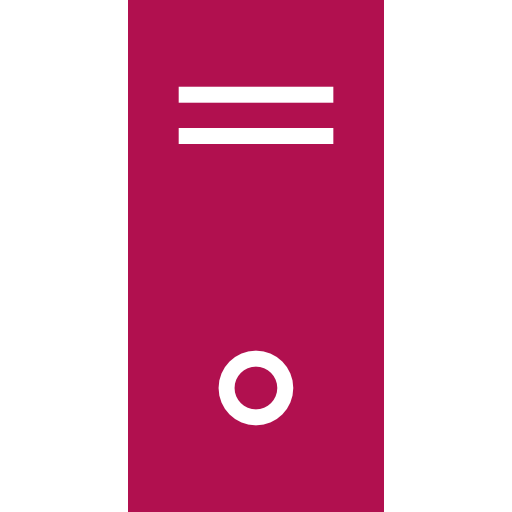
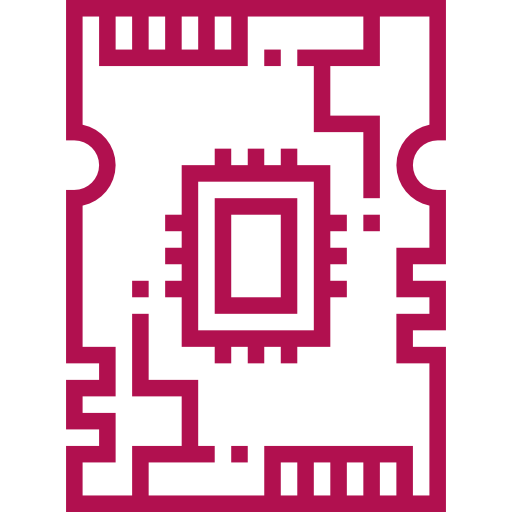
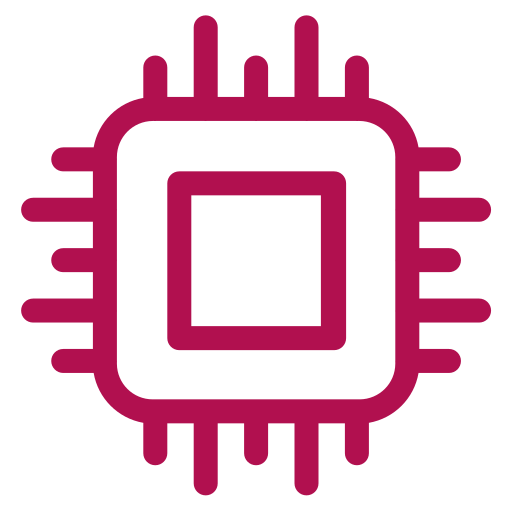
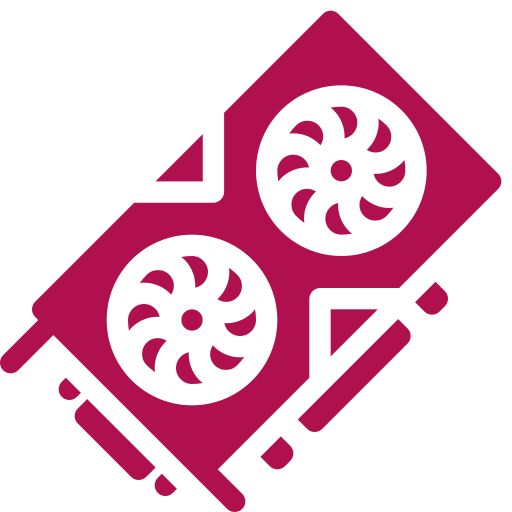
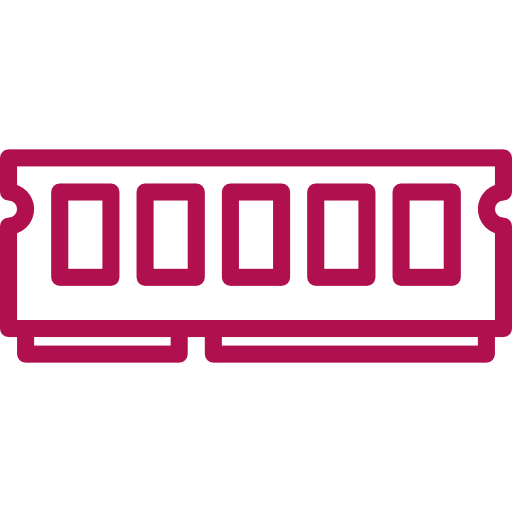
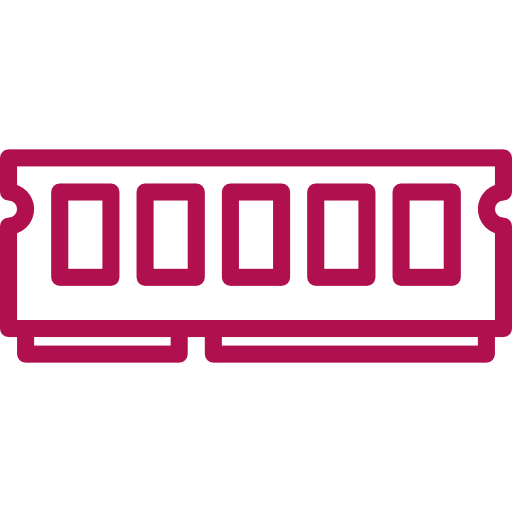
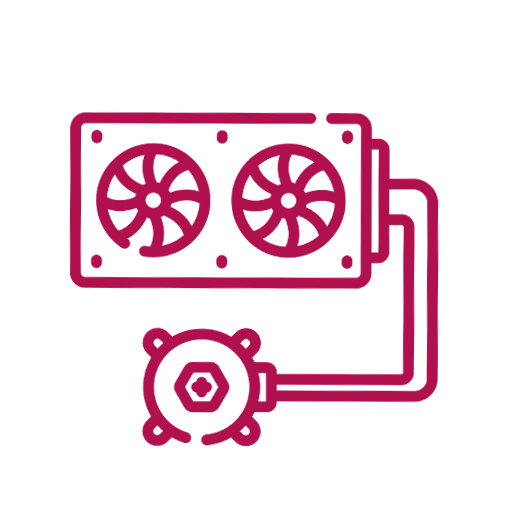
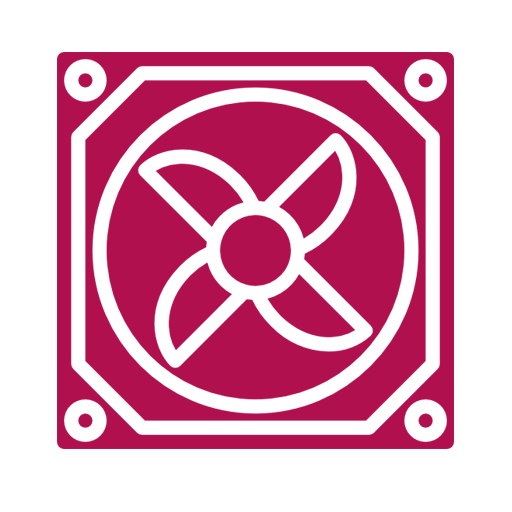
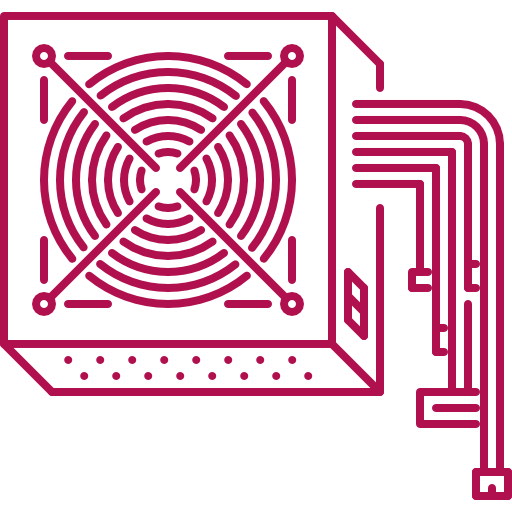
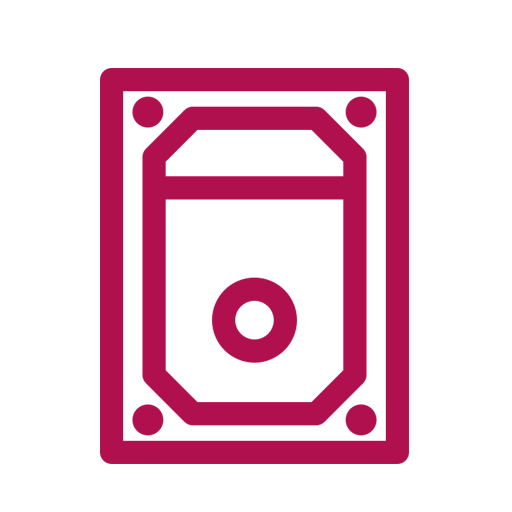
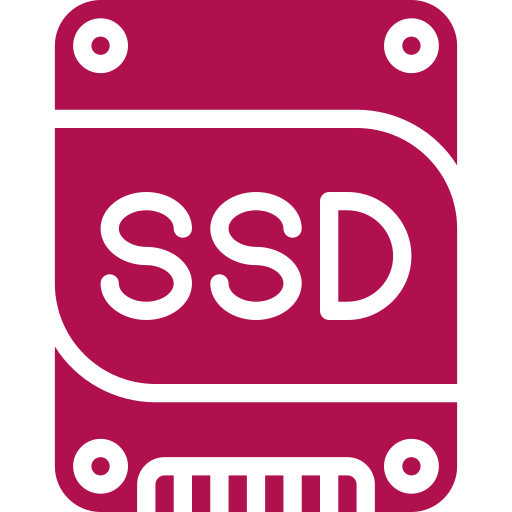

In [43]:
infiniarc_response.text

We get messy data back with a lot of html code. It's hard to find what we need. But if we turn it into soup (not soup in a bowl), we can easily pick out what we want using HTML tags.

In [44]:
# Parse the whole HTML page using BeautifulSoup
infiniarc_soup = BeautifulSoup(infiniarc_response.text, 'html.parser')

<!DOCTYPE html>
<html data-add2cart-redirect="1" data-main-object="ir.ui.view(4151,)" data-oe-company-name="Infiniarc" data-seo-object="component.type(79,)" data-website-id="1" lang="en-US">
 <head>
  <script type="application/ld+json">
   {
                    	"@context": "http://schema.org/",
                    	"@type": "WebSite",
                    	"url": "https://www.infiniarc.com/en",
                    	"potentialAction": {
                    		"@type": "SearchAction",
                    		"target": "{search_term_string}",
                    		"query-input": "required name=search_term_string"
                    	}
                    }
  </script>
  <script type="application/ld+json">
   {
                      "@context": "https://schema.org/", 
                      "@type": "BreadcrumbList", 
                      "itemListElement": [{
                        "@type": "ListItem", 
                        "position": 1, 
                        "name": "Infiniarc",
  
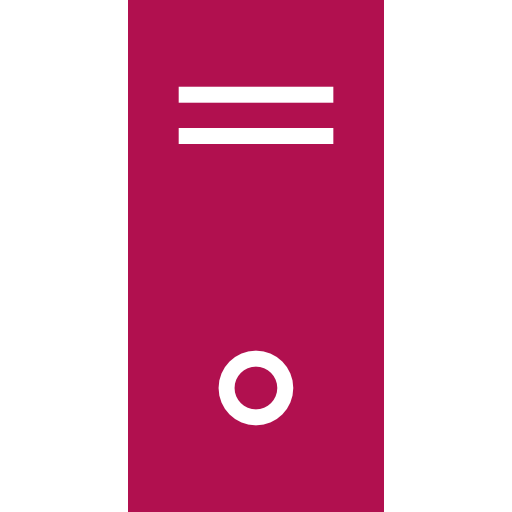
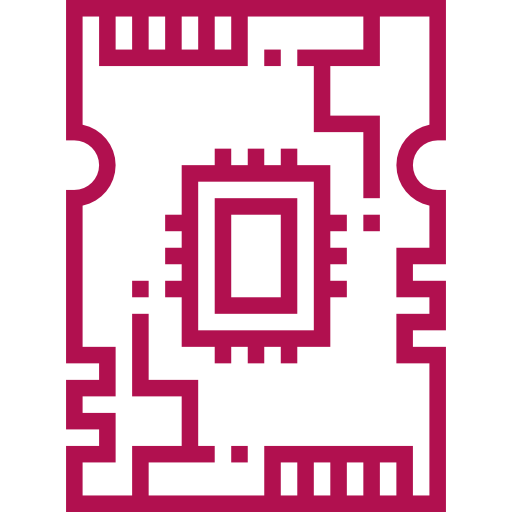
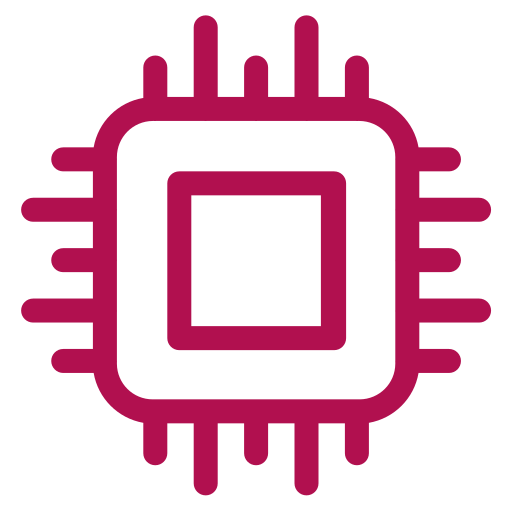
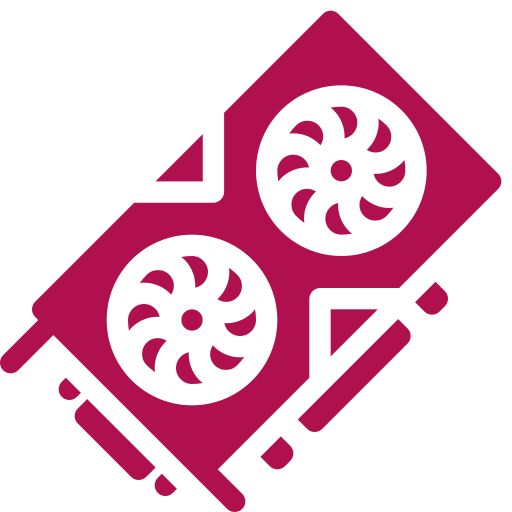
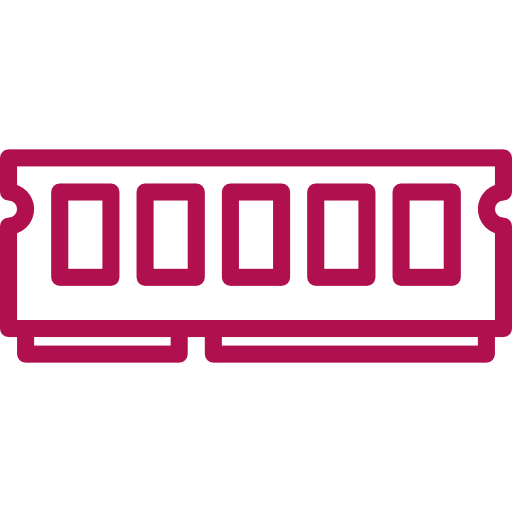
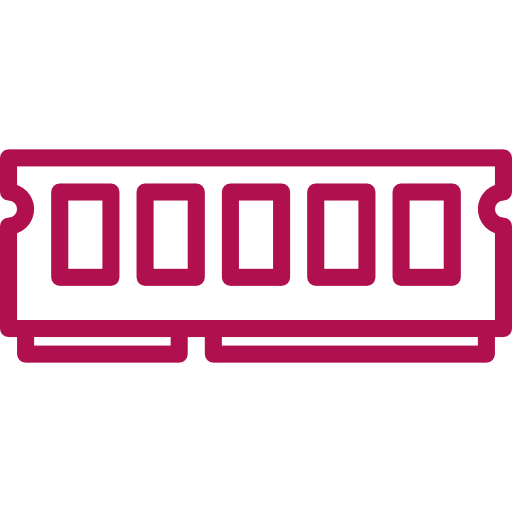
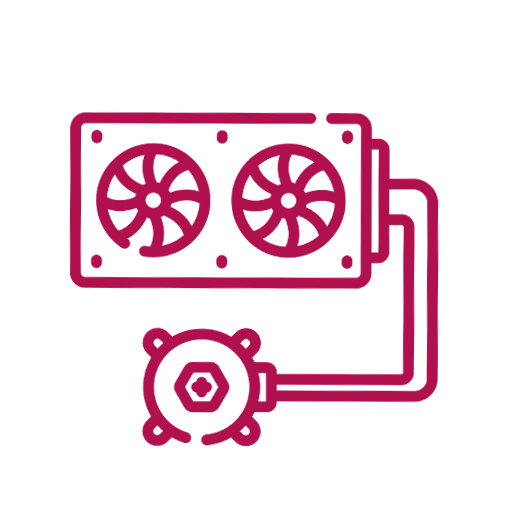
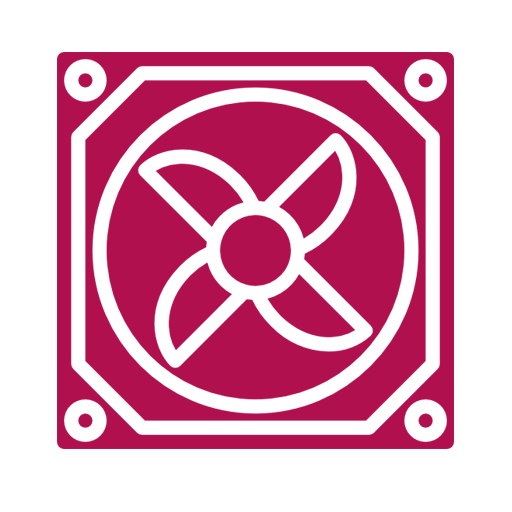
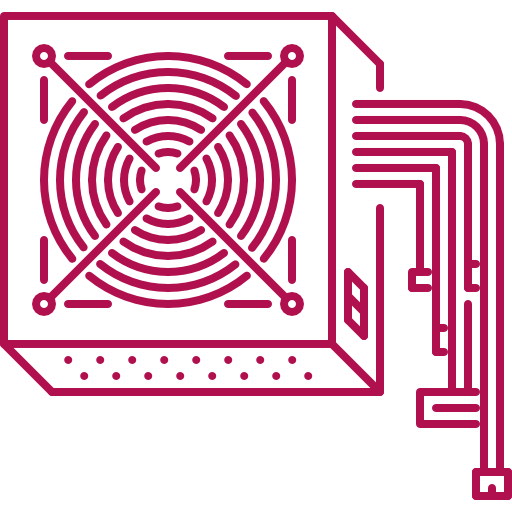
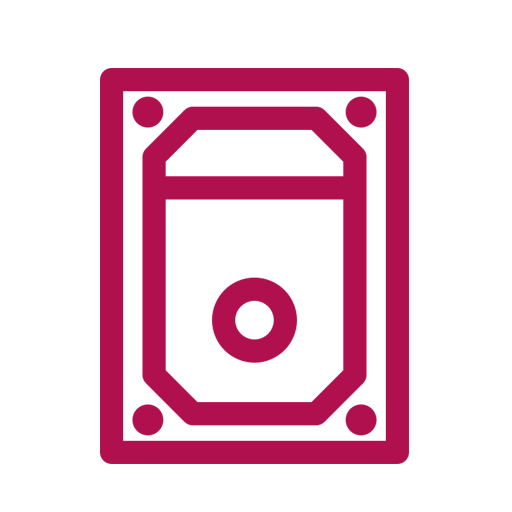
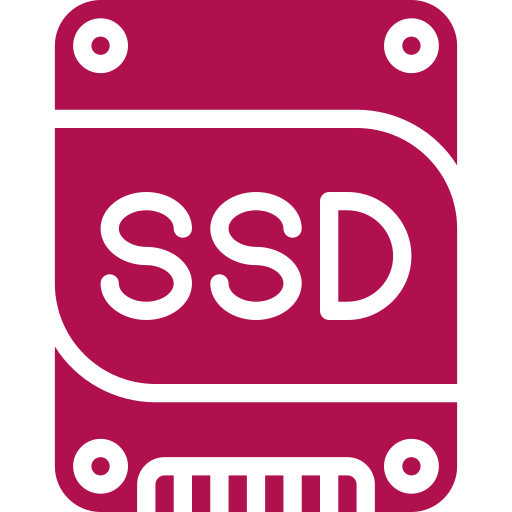

In [45]:
print(infiniarc_soup.prettify())



Now we can easily pick what we want using HTML tags:

In [46]:
# Title of the parsed page
infiniarc_soup.title

<title>motherboard</title>

In [47]:
# We can also get it without the HTML tags
infiniarc_soup.title.string

'motherboard'

### Collect products' name and price

In [51]:
first_product = infiniarc_soup.find('div', {'class':'cart-box float-left' })
print(first_product.prettify())

<div class="cart-box float-left">
 <div class="product-img text-center position-relative">
  <a class="d-block" href="/en/shop/90mb1fj0-m0eay0-asus-tuf-gaming-z790-pro-wifi-intel-lga1700-motherboard-6087">
   <img class="aaa" loading="lazy" src="https://www.infiniarc.com/infiniarc_images/static/src/images/product_template/image_512/product_template_6087.PNG"/>
  </a>
  <input id="wish_prod_id" type="hidden"/>
  <input id="productID" type="hidden" value="5840"/>
  <div class="like-symbol">
   <button class="btn o_add_wishlist_ian">
    <span aria-label="Added to wishlist" class="fa fa-heart text-white" role="img">
    </span>
   </button>
  </div>
  <div class="detail-symbol">
   <button class="btn viewQuckView-new" data-id="6087">
    <span>
     <i class="fa fa-search-plus text-white">
     </i>
    </span>
   </button>
  </div>
 </div>
 <div class="product-details w-100 float-left">
  <a class="d-block" href="/en/shop/90mb1fj0-m0eay0-asus-tuf-gaming-z790-pro-wifi-intel-lga1700-mother

We can use `prettify()` method to make the HTML or XML code more readable by adding indentation and line breaks. It formats the structure of the document in a visually appealing way, making it easier for humans to understand.

In [52]:
print(first_product.prettify())

<div class="cart-box float-left">
 <div class="product-img text-center position-relative">
  <a class="d-block" href="/en/shop/90mb1fj0-m0eay0-asus-tuf-gaming-z790-pro-wifi-intel-lga1700-motherboard-6087">
   <img class="aaa" loading="lazy" src="https://www.infiniarc.com/infiniarc_images/static/src/images/product_template/image_512/product_template_6087.PNG"/>
  </a>
  <input id="wish_prod_id" type="hidden"/>
  <input id="productID" type="hidden" value="5840"/>
  <div class="like-symbol">
   <button class="btn o_add_wishlist_ian">
    <span aria-label="Added to wishlist" class="fa fa-heart text-white" role="img">
    </span>
   </button>
  </div>
  <div class="detail-symbol">
   <button class="btn viewQuckView-new" data-id="6087">
    <span>
     <i class="fa fa-search-plus text-white">
     </i>
    </span>
   </button>
  </div>
 </div>
 <div class="product-details w-100 float-left">
  <a class="d-block" href="/en/shop/90mb1fj0-m0eay0-asus-tuf-gaming-z790-pro-wifi-intel-lga1700-mother

Let's extract the **product name:**

In [53]:
first_product.find('h3', class_='h3-product-name')

<h3 class="text-white h3-product-name dd">
                            ASUS TUF GAMING Z790-PRO WIFI, Intel LGA1700 Motherboard
                        </h3>

We aren't interested in the HTML details. Instead, We'll focus on extracting the *text*

In [54]:
first_product.find('h3', class_='h3-product-name').text

'\n                            ASUS TUF GAMING Z790-PRO WIFI, Intel LGA1700 Motherboard\n                        '

We'll do the same with the **price**. However, it's important to note that some products may have special offers, in such cases, we'll need to extract both the *regular price* and the *special price*.

In [57]:
first_product.find('p', class_='oe_currency_value')

No special price here but there are regular price

In [58]:
first_product.find('span', class_='oe_currency_value')

<span class="oe_currency_value">1,499.00</span>

In [59]:
first_product.find('span', class_='oe_currency_value').text

'1,499.00'

We can use `strip` to remove `\n` or any other extra spaces

In [60]:
first_product.find('span', class_='oe_currency_value').text.strip()

'1,499.00'

Let's put all in one function

In [64]:
def extract_product_details(prod):
    # Extract product name
    product_name = prod.find('h3', class_='h3-product-name').text.strip()

    # Extract price
    price_element = prod.find('p', class_='oe_currency_value')
    price = price_element.text.strip() if price_element else prod.find('span', class_='oe_currency_value').text.strip()

    # Extract old price if available
    #old_price_element = prod.find('span', class_='price', id=lambda x: x and x.startswith('old-price'))
    #old_price = old_price_element.text.strip() if old_price_element else None

    return product_name, price


We will use the `.find_all()` method to search the HTML tree for particular tags and get a `list` with all the products.

In [70]:
products = infiniarc_soup.find_all('div', {'class':'cart-box float-left'})
products

[<div class="cart-box float-left">
 <div class="product-img text-center position-relative">
 <a class="d-block" href="/en/shop/90mb1fj0-m0eay0-asus-tuf-gaming-z790-pro-wifi-intel-lga1700-motherboard-6087">
 <img class="aaa" loading="lazy" src="https://www.infiniarc.com/infiniarc_images/static/src/images/product_template/image_512/product_template_6087.PNG"/>
 </a>
 <input id="wish_prod_id" type="hidden"/>
 <input id="productID" type="hidden" value="5840"/>
 <div class="like-symbol">
 <button class="btn o_add_wishlist_ian">
 <span aria-label="Added to wishlist" class="fa fa-heart text-white" role="img"></span>
 </button>
 </div>
 <div class="detail-symbol">
 <button class="btn viewQuckView-new" data-id="6087">
 <span>
 <i class="fa fa-search-plus text-white"></i>
 </span>
 </button>
 </div>
 </div>
 <div class="product-details w-100 float-left">
 <a class="d-block" href="/en/shop/90mb1fj0-m0eay0-asus-tuf-gaming-z790-pro-wifi-intel-lga1700-motherboard-6087">
 <h3 class="text-white h3-pro

In [71]:
# Loop through the products
for prod in products:
    product_name, price = extract_product_details(prod)

    # Print the results
    print("Product Name:", product_name)
    print("Price:", price)
    print("----------")


Product Name: ASUS TUF GAMING Z790-PRO WIFI, Intel LGA1700 Motherboard
Price: 1,499.00
----------
Product Name: Gigabyte B760 DS3H DDR4 /LGA 1700/ATX
Price: 566.00
----------
Product Name: Gigabyte B760M DS3H AX DDR4 LGA 1700 Dual M.2, WiFi 6E, M-ATX Motherboard
Price: 600.00
----------
Product Name: Gigabyte Z790 AORUS ELITE X WIFI7 DDR5
Price: 1,349.00
----------
Product Name: Gigabyte Z590 AORUS ULTRA WIFI DDR4 MOTHERBOARD
Price: 999.00
----------
Product Name: GIGABYTE Z790 AORUS ELITE X AX LGA 1700 ATX DDR5 Wi-Fi 6E Motherboard
Price: 1,249.00
----------
Product Name: Gigabyte B760M DS3H DDR4 LGA 1700 Intel B760 M-ATX Motherboard with DDR4, Dual M.2, PCIe 4.0, USB 3.2 Gen 2 Type-C, 2.5G...
Price: 499.00
----------
Product Name: Gigabyte Z790 GAMING X AX WI-FI DDR5 MOTHERBOAD (rev. 1.0)
Price: 1,049.00
----------
Product Name: Gigabyte Z790 AORUS ELITE AX 1.1, 1700, DDR5 ATX Motherboard
Price: 1,399.00
----------
Product Name: Gigabyte Z790 AORUS XTREME X ICE Intel LGA1700 DDR5 ATX

We've collected the data for oil products. Now, let's collect data for other categories:

In [91]:
# You can scrape these names too from the website but for simplicity we will go with hardcode
categories = ['cases-81', 'motherboards-79', 'central-processing-unit-cpu-80', 'graphics-processing-unit-gpu-82', 'memory-85', 'ssd-m-2-104', 'cooling-83','fans-97','power-supply-units-psu-84']

In [92]:
# othaim's website
base_url = 'https://www.infiniarc.com/en/gear-components/'

# Loop through categories
for category in categories:
    # Construct the URL for the category page
    category_url = base_url + category + '.html'

    # Send a GET request to the category URL
    response = requests.get(category_url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')

        # Here you can write your scraping logic to extract information from the page
        # Let's find all product names or prices
        products = soup.find_all('div', {'class':'cart-box float-left'})
        for prod in products:
            product_name, price, old_price = extract_product_details(prod)

            # Print the results
            print("Product Name:", product_name)
            print("Price:", price)
            #print("Old Price:", old_price)
            print("----------")

    else:
        print("Failed to retrieve data for category:", category)


Failed to retrieve data for category: cases-81
Failed to retrieve data for category: motherboards-79
Failed to retrieve data for category: central-processing-unit-cpu-80
Failed to retrieve data for category: graphics-processing-unit-gpu-82
Failed to retrieve data for category: memory-85
Failed to retrieve data for category: ssd-m-2-104
Failed to retrieve data for category: cooling-83
Failed to retrieve data for category: fans-97
Failed to retrieve data for category: power-supply-units-psu-84


## From web data to analysis

Let's start by storing the data into lists. Later, we can organize this data into a DataFrame for further analysis.

In [98]:
# othaim's website
base_url = 'https://www.infiniarc.com/en/gear-components/'

# Loop through the products
products_name = []
prices = []
old_prices = []

# Loop through categories
for category in categories:
    # Construct the URL for the category page
    category_url = base_url + category

    # Send a GET request to the category URL
    response = requests.get(category_url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')

        # Here you can write your scraping logic to extract information from the page
        # Let's find all product names or prices
        products = soup.find_all('div', {'class':'cart-box float-left'})

        for prod in products:
            product_name, price = extract_product_details(prod)

            # put the results in a list
            products_name.append(product_name)
            prices.append(price)
            #old_prices.append(old_price)

    else:
        print("Failed to retrieve data for category:", category)
        print(response.status_code)


In [100]:
# put all in the dataframe
df = pd.DataFrame({'name':products_name, 'price':prices})
df

,name,price
0,Infiniarc Cube Flow XL 6 RGB Fans With Control,449.00
1,DEEPCOOL MATREXX 70 ADD-RGB 3F Mid-Tower Case ...,399.00
2,Deepcool Matrexx 55 RGB 4 Fans Case,340.00
3,NZXT H9 Elite Edition Dual Chamber ATX Mid To...,959.00
4,Jonsbo MOD-3 Black Gaming Case,280.00
...,...,...
103,CORSAIR RM750x SHIFT 80 PLUS Gold Fully Modula...,699.00
104,DeepCool PX1000G 80 Plus Gold Medal Full-Modul...,800.00
105,CORSAIR RM850e Fully Modular GOLD Low-Noise AT...,629.00
106,DEEPCOOL PX850G 80 Plus Gold Medal Full-Module...,600.00


In [101]:
import re

text = 'Special Price\n\n 21.95'

re.findall(r'[0-9]+\.[0-9]+', text)

['21.95']

In [102]:
print(r'a\nb')

a\nb


#### Scroll for more?

We've only collected data for *154* products, but Othaim Market has more than that, Right?!.

These are just the products displayed at the top of each webpage. To retrieve the rest of the products, we'll need to scroll down. How to scroll in code? We can do this programmatically using the *Selenium library.* We will talk about this later.

#### Let's clean

The price includes the text `Special Price\n\n`. Let's clean it up and keep only the price:

In [103]:
df.price.str.extract(r'(?P<Col1>[0-9]+)\.(?P<Col2>[0-9]+)')

,Col1,Col2
0,449,00
1,399,00
2,340,00
3,959,00
4,280,00
...,...,...
103,699,00
104,800,00
105,629,00
106,600,00


In [104]:
df.price = df.price.str.extract(r'(\d+\.\d+)')

In [105]:
df

,name,price
0,Infiniarc Cube Flow XL 6 RGB Fans With Control,449.00
1,DEEPCOOL MATREXX 70 ADD-RGB 3F Mid-Tower Case ...,399.00
2,Deepcool Matrexx 55 RGB 4 Fans Case,340.00
3,NZXT H9 Elite Edition Dual Chamber ATX Mid To...,959.00
4,Jonsbo MOD-3 Black Gaming Case,280.00
...,...,...
103,CORSAIR RM750x SHIFT 80 PLUS Gold Fully Modula...,699.00
104,DeepCool PX1000G 80 Plus Gold Medal Full-Modul...,800.00
105,CORSAIR RM850e Fully Modular GOLD Low-Noise AT...,629.00
106,DEEPCOOL PX850G 80 Plus Gold Medal Full-Module...,600.00


It's a good practice to save the original data before analyzing it further. This way, if we make any changes and need to revert to the original data, we won't have to run the scraping code again, which is often time-consuming.

In [107]:
df.to_csv('othaim_sample_prod.csv', index=False)

Let's do quick analysis on the percentage of discounted products in this sample

In [112]:
df

,name,price
0,Infiniarc Cube Flow XL 6 RGB Fans With Control,449.00
1,DEEPCOOL MATREXX 70 ADD-RGB 3F Mid-Tower Case ...,399.00
2,Deepcool Matrexx 55 RGB 4 Fans Case,340.00
3,NZXT H9 Elite Edition Dual Chamber ATX Mid To...,959.00
4,Jonsbo MOD-3 Black Gaming Case,280.00
...,...,...
103,CORSAIR RM750x SHIFT 80 PLUS Gold Fully Modula...,699.00
104,DeepCool PX1000G 80 Plus Gold Medal Full-Modul...,800.00
105,CORSAIR RM850e Fully Modular GOLD Low-Noise AT...,629.00
106,DEEPCOOL PX850G 80 Plus Gold Medal Full-Module...,600.00


In [114]:
df.has_discount.value_counts(normalize=True)

AttributeError: 'DataFrame' object has no attribute 'has_discount'

<Axes: ylabel='count'>

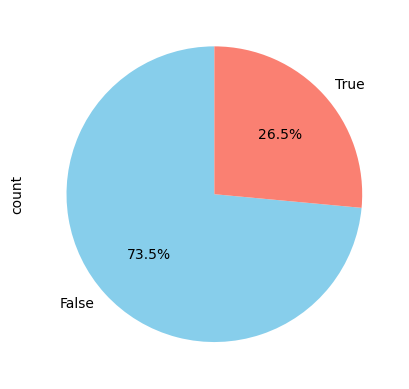

In [ ]:
df.has_discount.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])

## Advanced web scraping tools

**[Scrapy](https://scrapy.org)** is a Python framework for large scale web scraping. It gives you all the tools you need to efficiently extract data from websites, process them as you want, and store them in your preferred structure and format.

**[Selenium](https://selenium-python.readthedocs.io/index.html)** is an umbrella project encapsulating a variety of tools and libraries enabling web browser automation. Selenium specifically provides infrastructure for the W3C WebDriver specification — a platform and language-neutral coding interface compatible with all major web browsers. We can use it to imitate a user's behaviour and interact with Javascript elements (buttons, sliders etc.).

For now, let's see how Selenium works.

### How to install Selenium

1. If you are using Anaconda: `conda install -c conda-forge selenium `
2. Download the driver for your web browser for [here](https://selenium-python.readthedocs.io/installation.html#drivers).
3. Choose a driver that corresponds to your web browser's version.
4. Unzip the file and move the executable to your working directory.

#### Important note on Selinium and web drivers

- If you are running this notebook locally, follow the above steps and run the code directly below (change the path to where your web driver is located).
- If you are running this notebook on colab, skip the next cell and run the one below it.

### Scraping data with Selenium

<img src='../assets/scraping/selenium-pipeline.png' width='1024'>

## Ethical considerations

**You can scrape it, should you though?**


*Here's a good summary of practices for ethical web scraping:*

- Respect the rules: Always check the website's robots.txt file and terms of service (TOS) first. These will tell you if scraping is allowed and what data you can access.
- Be a good guest: Don't overload the website with requests. Space out your scraping requests and be gentle on the server. Avoid scraping during peak hours.
- Identify yourself: Use a user-agent string to identify your scraper as a bot. This allows the website owner to contact you if there are any issues.
- Public data only: Focus on scraping publicly available information, not private user data or sensitive content.
- Check for APIs: Many websites offer APIs (Application Programming Interfaces) that allow you to access data programmatically. This is often the preferred method as it avoids scraping altogether.

- Minimize data collection: only save the data I absolutely need from your page to fulfill my purpose. This helps protect your privacy and bandwidth.

- Inspecting the **robots.txt** file: Always inspect the website's *robots.txt* file for rules about what pages can be scraped, indexed, etc.

### What is a robots.txt?

A simple text file placed on the web server which tells crawlers which file they can and cannot access. It's also called _The Robots Exclusion Protocol_.

<img src='https://github.com/nestauk/im-tutorials/blob/3-ysi-tutorial/figures/Web-Scraping/robots.png?raw=1' width="600">

#### Some examples

In [ ]:
print(requests.get('https://www.nesta.org.uk/robots.txt').text)
print('-----')
print(requests.get('https://www.boxofficemojo.com/robots.txt').text)
print('-----')
print(requests.get('https://www.howtogeek.com/robots.txt').text)

User-Agent: *

Disallow: /search/

Allow: /

-----
# robots.txt for BoxOfficeMojo
User-agent: *
Allow: /

-----


ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

#### What's a User-Agent?

A User-Agent is a string identifying the browser and operating system to the web server. It's your machine's way of saying _Hi, I am Chrome on macOS_ to a web server.

Web servers use user agents for a variety of purposes:
* Serving different web pages to different web browsers. This can be used for good – for example, to serve simpler web pages to older browsers – or evil – for example, to display a “This web page must be viewed in Internet Explorer” message.
* Displaying different content to different operating systems – for example, by displaying a slimmed-down page on mobile devices.
* Gathering statistics showing the browsers and operating systems in use by their users. If you ever see browser market-share statistics, this is how they’re acquired.

Let's break down the structure of a human-operated User-Agent:

```Mozilla/5.0 (iPad; U; CPU OS 3_2_1 like Mac OS X; en-us) AppleWebKit/531.21.10 (KHTML, like Gecko) Mobile/7B405```

The components of this string are as follows:

* Mozilla/5.0: Previously used to indicate compatibility with the Mozilla rendering engine.
* (iPad; U; CPU OS 3_2_1 like Mac OS X; en-us): Details of the system in which the browser is running.
* AppleWebKit/531.21.10: The platform the browser uses.
* (KHTML, like Gecko): Browser platform details.
* Mobile/7B405: This is used by the browser to indicate specific enhancements that are available directly in the browser or through third parties. An example of this is Microsoft Live Meeting which registers an extension so that the Live Meeting service knows if the software is already installed, which means it can provide a streamlined experience to joining meetings.

When scraping websites, it is a good idea to include your contact information as a custom **User-Agent** string so that the webmaster can get in contact. For example:

In [ ]:
headers = {
    'User-Agent': 'Kostas Stathoulopoulos bot',
    'From': 'konstantinos.stathoulopoulos@nesta.org.uk'
}
request = requests.get('https://www.nesta.org.uk/', headers=headers)
print(request.request.headers)

{'User-Agent': 'Kostas Stathoulopoulos bot', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive', 'From': 'konstantinos.stathoulopoulos@nesta.org.uk'}
